In [2]:
from importlib import reload

In [3]:
from pathlib import Path
from glob import glob

import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import convergence_plots as cp
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200 # bigger figures, yayy!

In [120]:
folder = Path(r"outputs/parametric/example_dg_laplace2D/")
df = pd.DataFrame()
for file in folder.glob("*.csv"):
    df = df.append(
        cp.calculate_num_order(pd.read_csv(file).assign(
            expid=file.name.split("r")[0].replace("_", "")))
    )
df["h-2"] = 1/df["h"]**2
df["gel"] = df["gel"].map(cp.gel_names)

print("order:")
print(df["order"].unique())
print("gel:")
print(df["gel"].unique())
print("diffcoef:")
print(df["diffcoef"].unique())
print("cw:")
print(df["cw"].unique())
print("cfl:")
print(df["cfl"].unique())


order:
[1. 2. 3. 4.]
gel:
['Quadrilaterals' 'Triangles']
diffcoef:
[0.001 0.01  0.1   1.   ]
cw:
[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]
cfl:
[nan]


In [71]:
df.columns

Index(['Unnamed: 0', 'h', 'n_cells', 'mean_vol', 'order', 'n_dof', 'ana_l2',
       'diff_l2', 'err_rel', 'elapsed', 'cour', 'actual_dt', 'nls_error',
       'nls_iter', 'num_order', 'adflux', 'limit', 'cw', 'diffcoef',
       'diffscheme', 'cfl', 'dt', 'gel', 'expid', 'h-2'],
      dtype='object')

## Whole dataframe

In [76]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[['h', 'n_cells', 'mean_vol', 'order', 'n_dof',
           'diff_l2', 'err_rel', 'cour', 'actual_dt', 'num_order', 'cw', 'diffcoef',
           'cfl', 'dt', 'gel', 'expid', 'h-2']])

,h,n_cells,mean_vol,order,n_dof,diff_l2,err_rel,cour,actual_dt,num_order,cw,diffcoef,cfl,dt,gel,expid,h-2
0,0.707107,16.0,0.250000,0.0,16.0,1.130886e-01,8.759806e-01,NaN,NaN,NaN,1.0,0.001,NaN,NaN,Quadrilaterals,00000,2.000000
1,0.500000,64.0,0.125000,0.0,64.0,6.803171e-02,5.269713e-01,NaN,NaN,0.733174,1.0,0.001,NaN,NaN,Quadrilaterals,00000,4.000000
2,0.353553,256.0,0.062500,0.0,256.0,3.833825e-02,2.969668e-01,NaN,NaN,0.827423,1.0,0.001,NaN,NaN,Quadrilaterals,00000,8.000000
3,0.250000,1024.0,0.031250,0.0,1024.0,2.043560e-02,1.582935e-01,NaN,NaN,0.907699,1.0,0.001,NaN,NaN,Quadrilaterals,00000,16.000000
4,0.707107,16.0,0.250000,1.0,64.0,1.943224e-02,1.505215e-01,NaN,NaN,NaN,1.0,0.001,NaN,NaN,Quadrilaterals,00000,2.000000
5,0.500000,64.0,0.125000,1.0,256.0,4.920726e-03,3.811578e-02,NaN,NaN,1.981509,1.0,0.001,NaN,NaN,Quadrilaterals,00000,4.000000
6,0.353553,256.0,0.062500,1.0,1024.0,1.534777e-03,1.188833e-02,NaN,NaN,1.680842,1.0,0.001,NaN,NaN,Quadrilaterals,00000,8.000000
7,0.250000,1024.0,0.031250,1.0,4096.0,1.030751e-03,7.984161e-03,NaN,NaN,0.574334,1.0,0.001,NaN,NaN,Quadrilaterals,00000,16.000000
8,0.707107,16.0,0.250000,2.0,144.0,2.790704e-03,2.161670e-02,NaN,NaN,NaN,1.0,0.001,NaN,NaN,Quadrilaterals,00000,2.000000
9,0.500000,64.0,0.125000,2.0,576.0,1.123271e-03,8.700820e-03,NaN,NaN,1.312923,1.0,0.001,NaN,NaN,Quadrilaterals,00000,4.000000


## Safe dataframe

In [24]:
out_df = df[['h', 'n_cells', 'mean_vol', 'order', 'n_dof',
           'diff_l2', 'err_rel', 'cour', 'actual_dt', 'num_order', 'cw', 'diffcoef',
           'cfl', 'dt', 'gel', 'expid', 'h-2']]

In [26]:
out_df.to_excel("laplace.xlsx")

## Aggregated advdiff, laplace

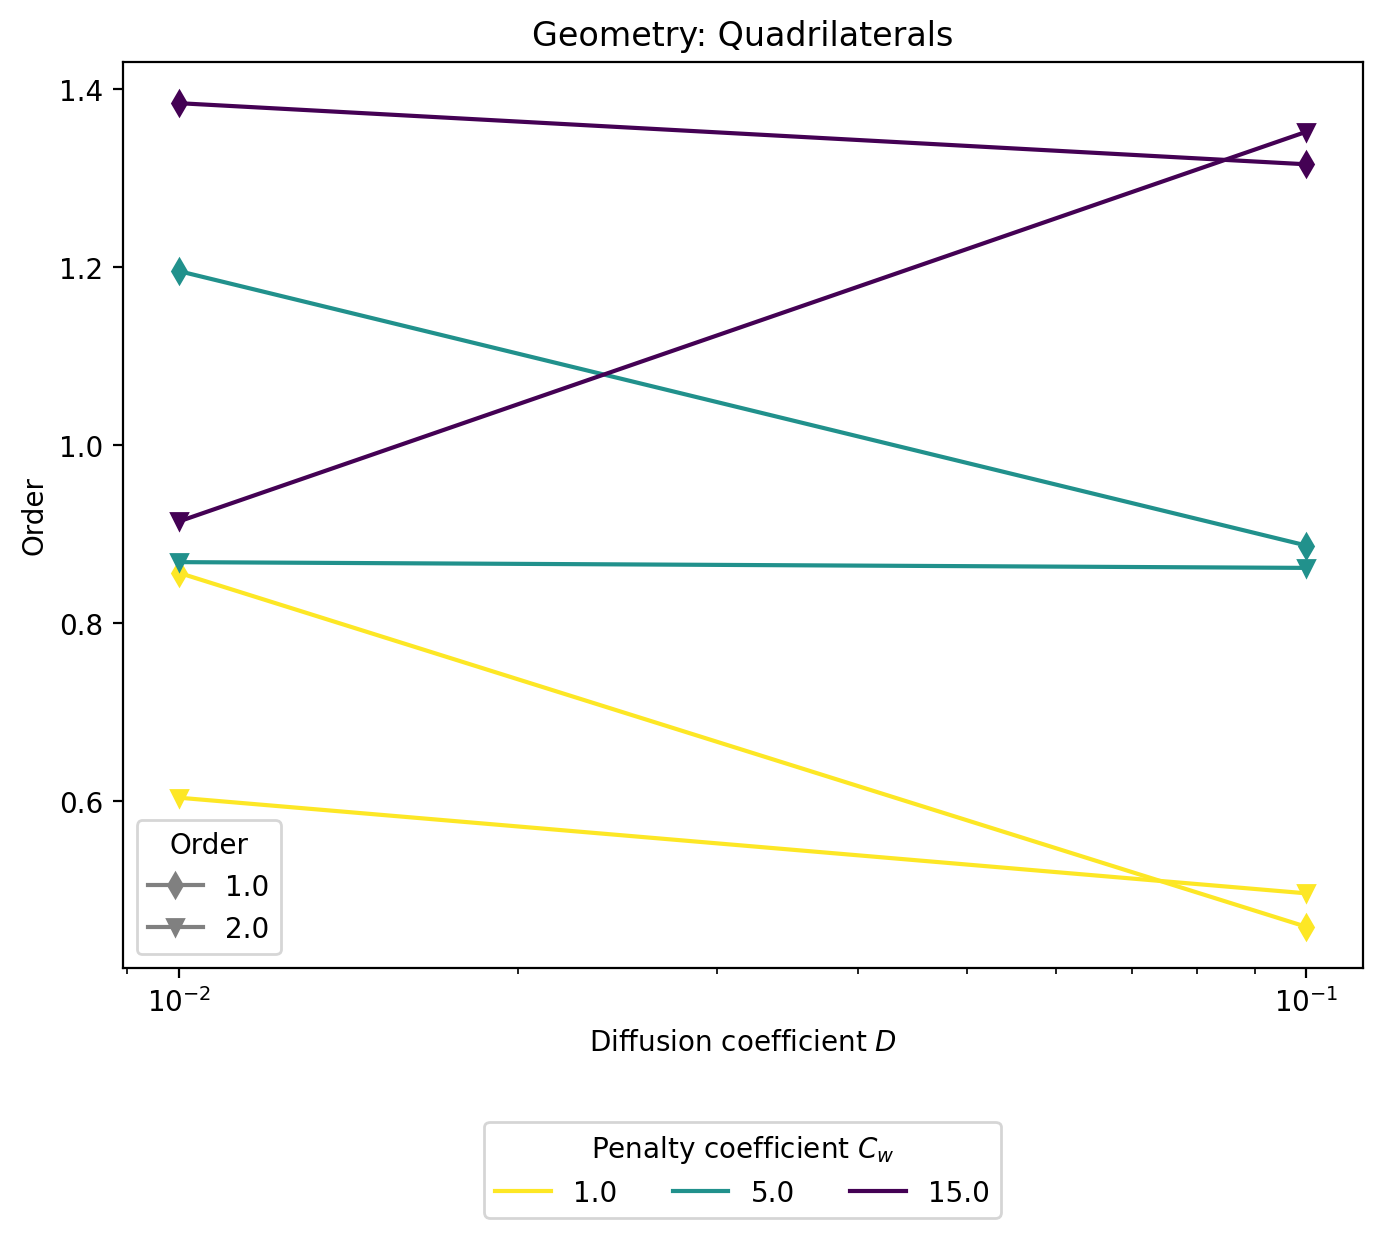

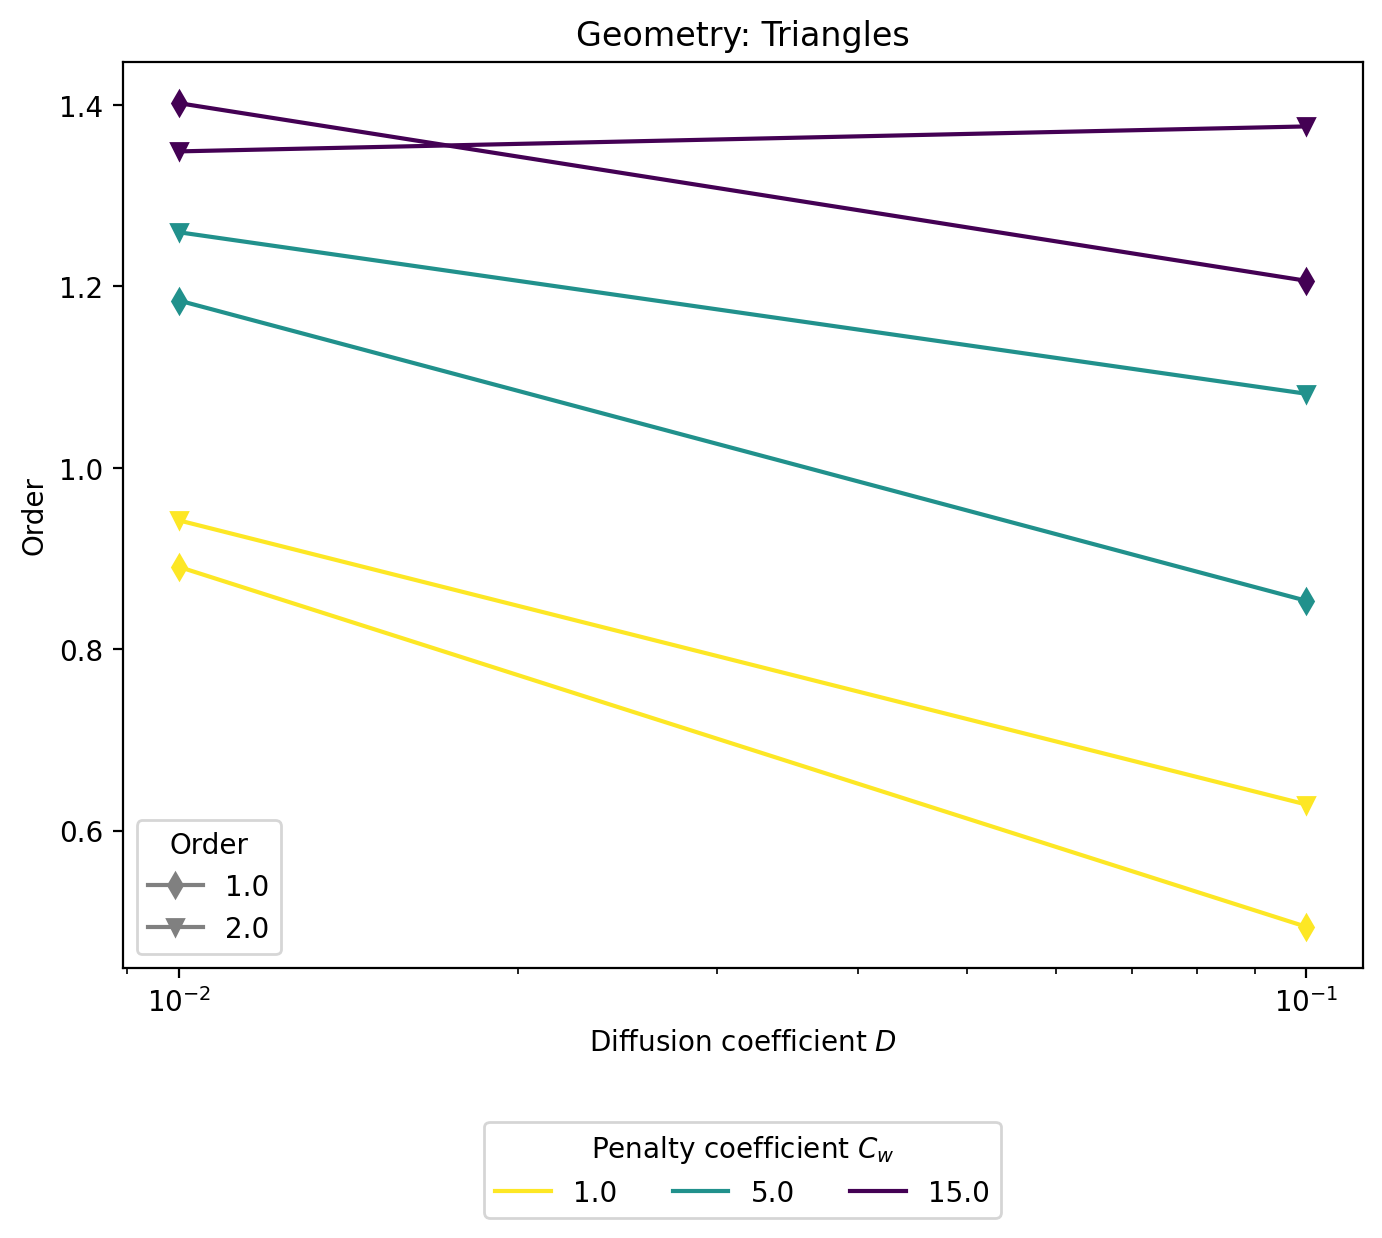

In [82]:
for gel in df["gel"].unique():
    fe = cp.plot_agregated_var(df[(df["gel"] == gel)],
                            y_var="num_order", y_lab="Order", ylogscale=False,
                            x_var="diffcoef", x_lab="Diffusion coefficient $D$",
                            color_var="cw",
                            color_lab="Penalty coefficient $C_w$",
                            ax_title = f"Geometry: {gel}")
    #fe.savefig("nls_err_plot.pdf")

## Advdiff, laplace nad burgers 2D

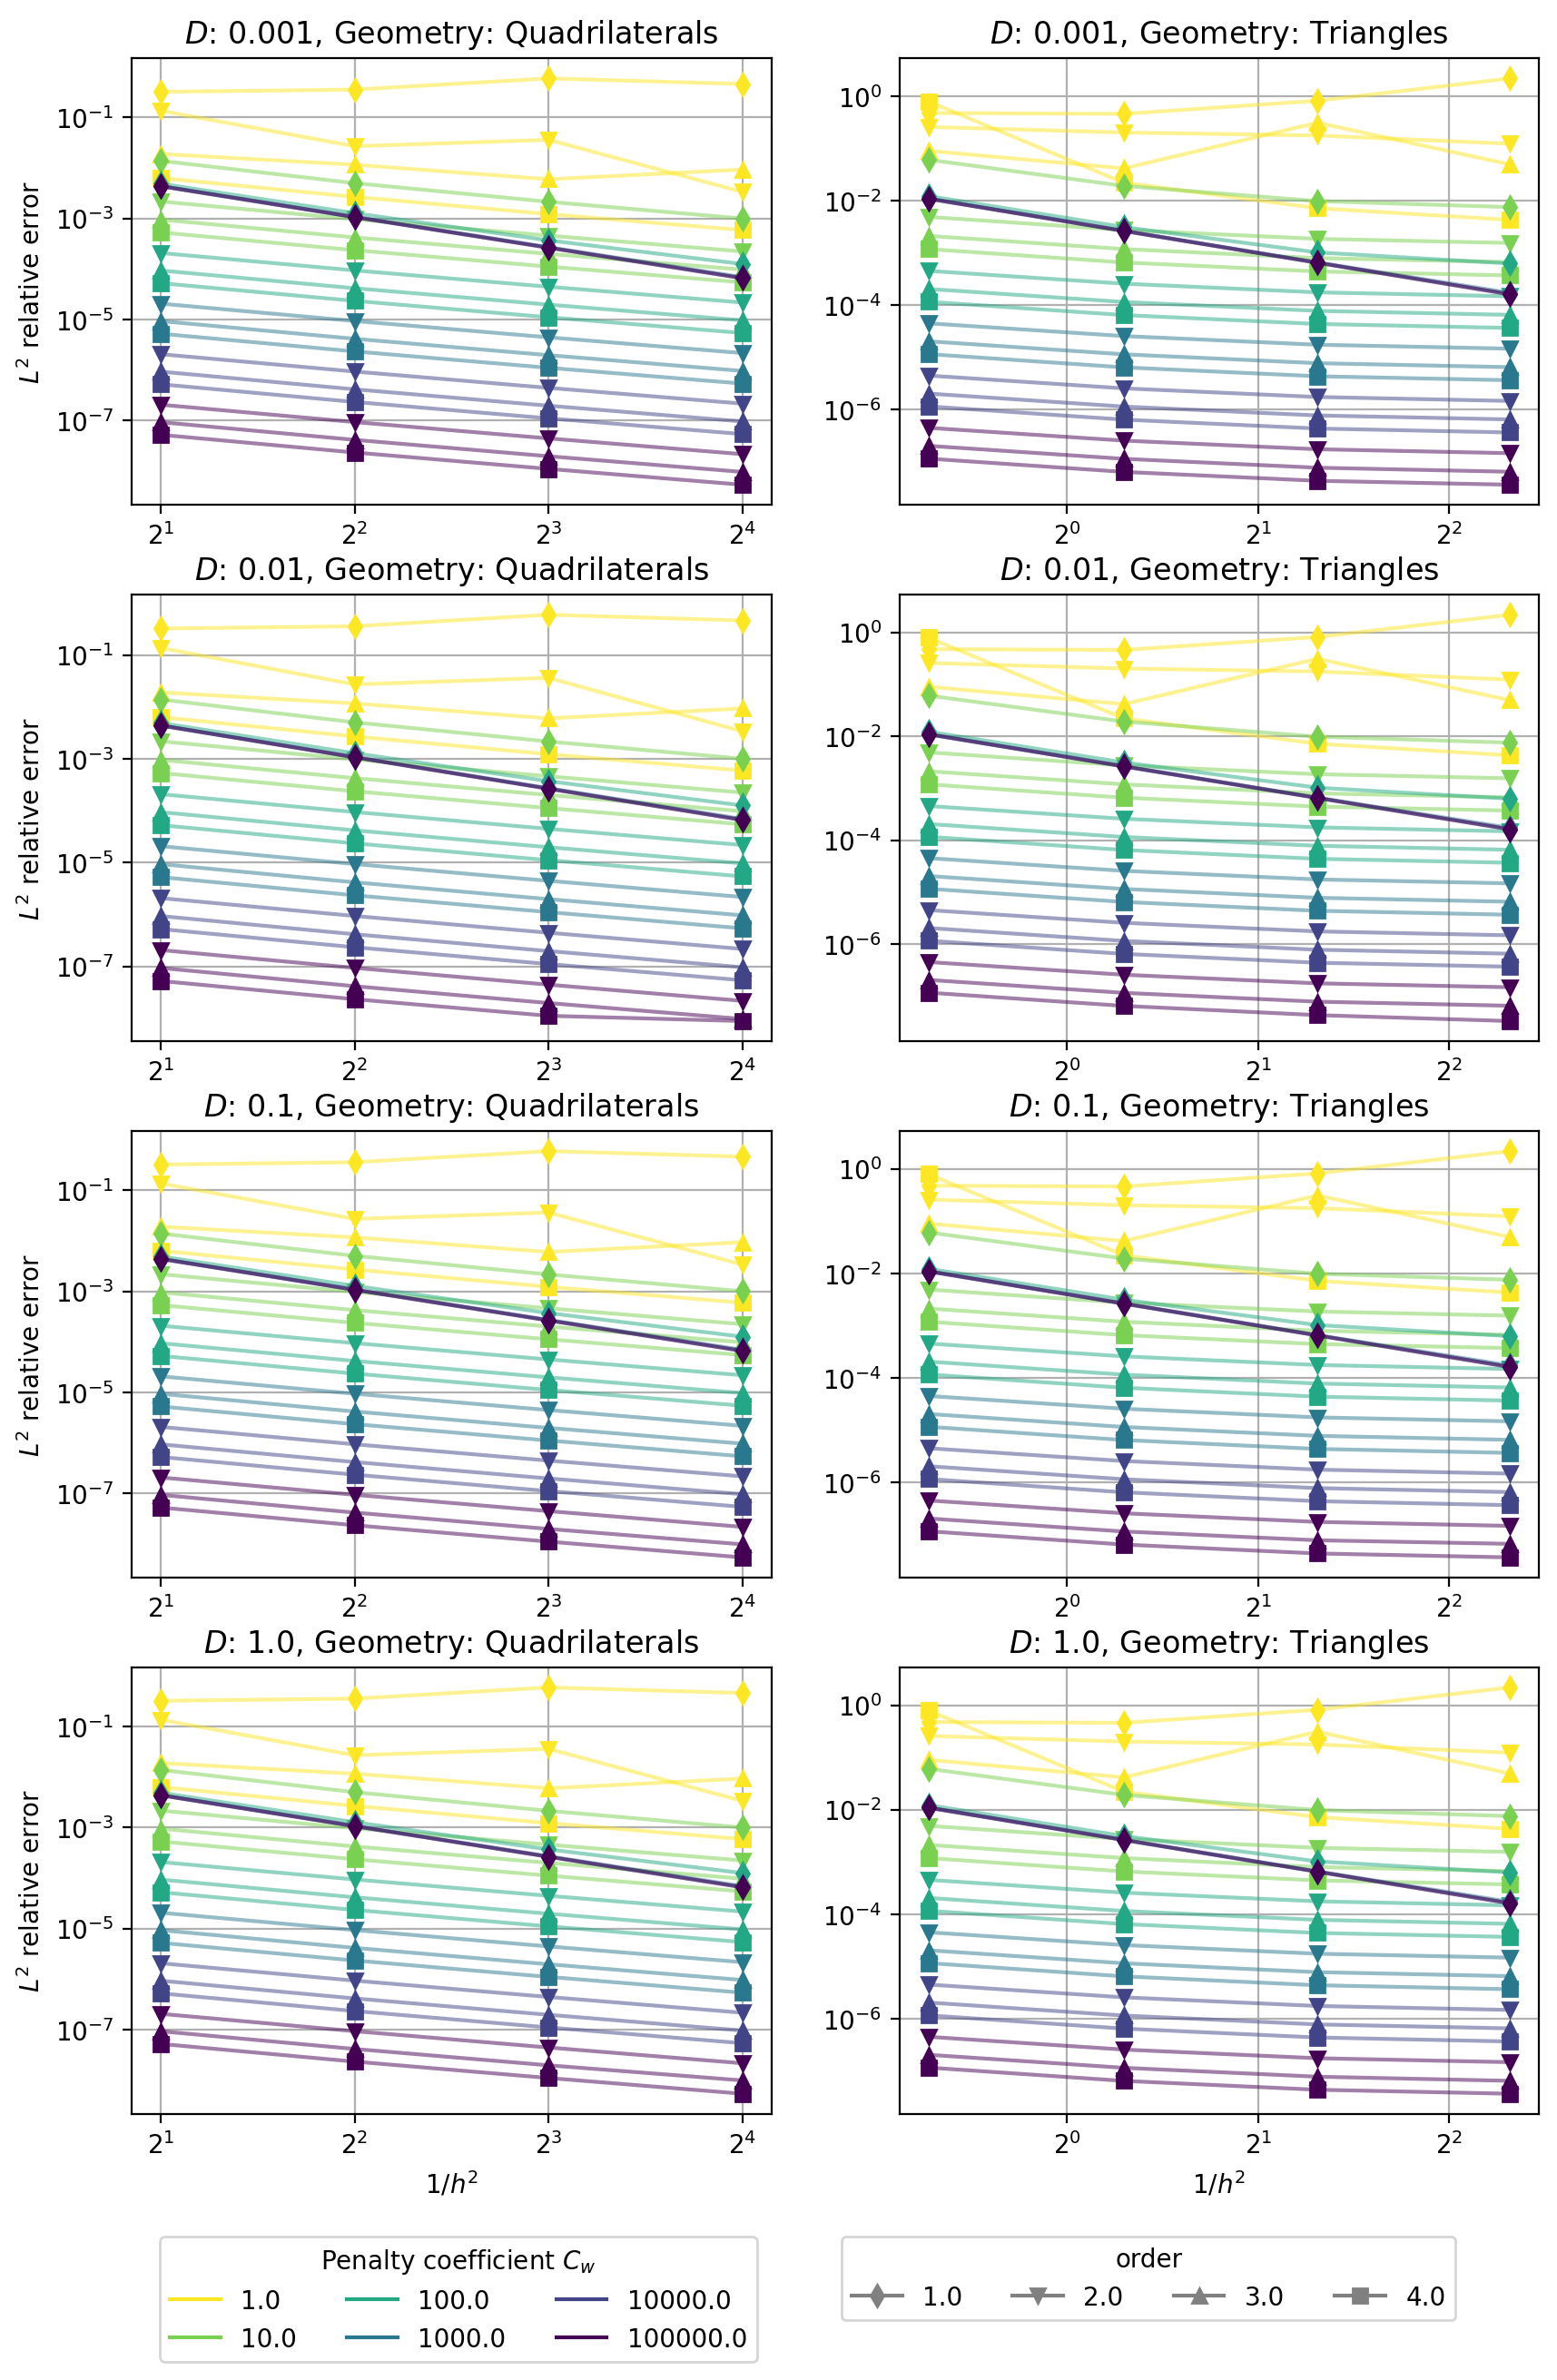

In [121]:
f = cp.plot_parametrized_var(df,
                   y_var="diff_l2", y_lab="$L^2$ relative error",
                   x_var="h-2", x_lab="$1/h^2$",
                   row_var="diffcoef", row_lab="$D$",
                   column_var="gel", column_lab="Geometry",
                   color_var="cw", color_lab="Penalty coefficient $C_w$",
                   alpha=.5,
                   figsize=(10, 15),
                   lines_leg_rect=[0.30, 0.07, 0.01, 0.01],
                   marks_leg_rect=[0.68, .07, 0.01, 0.01]
                   )

f.savefig("conv_plot.pdf")

## Burgers 2D aggregated

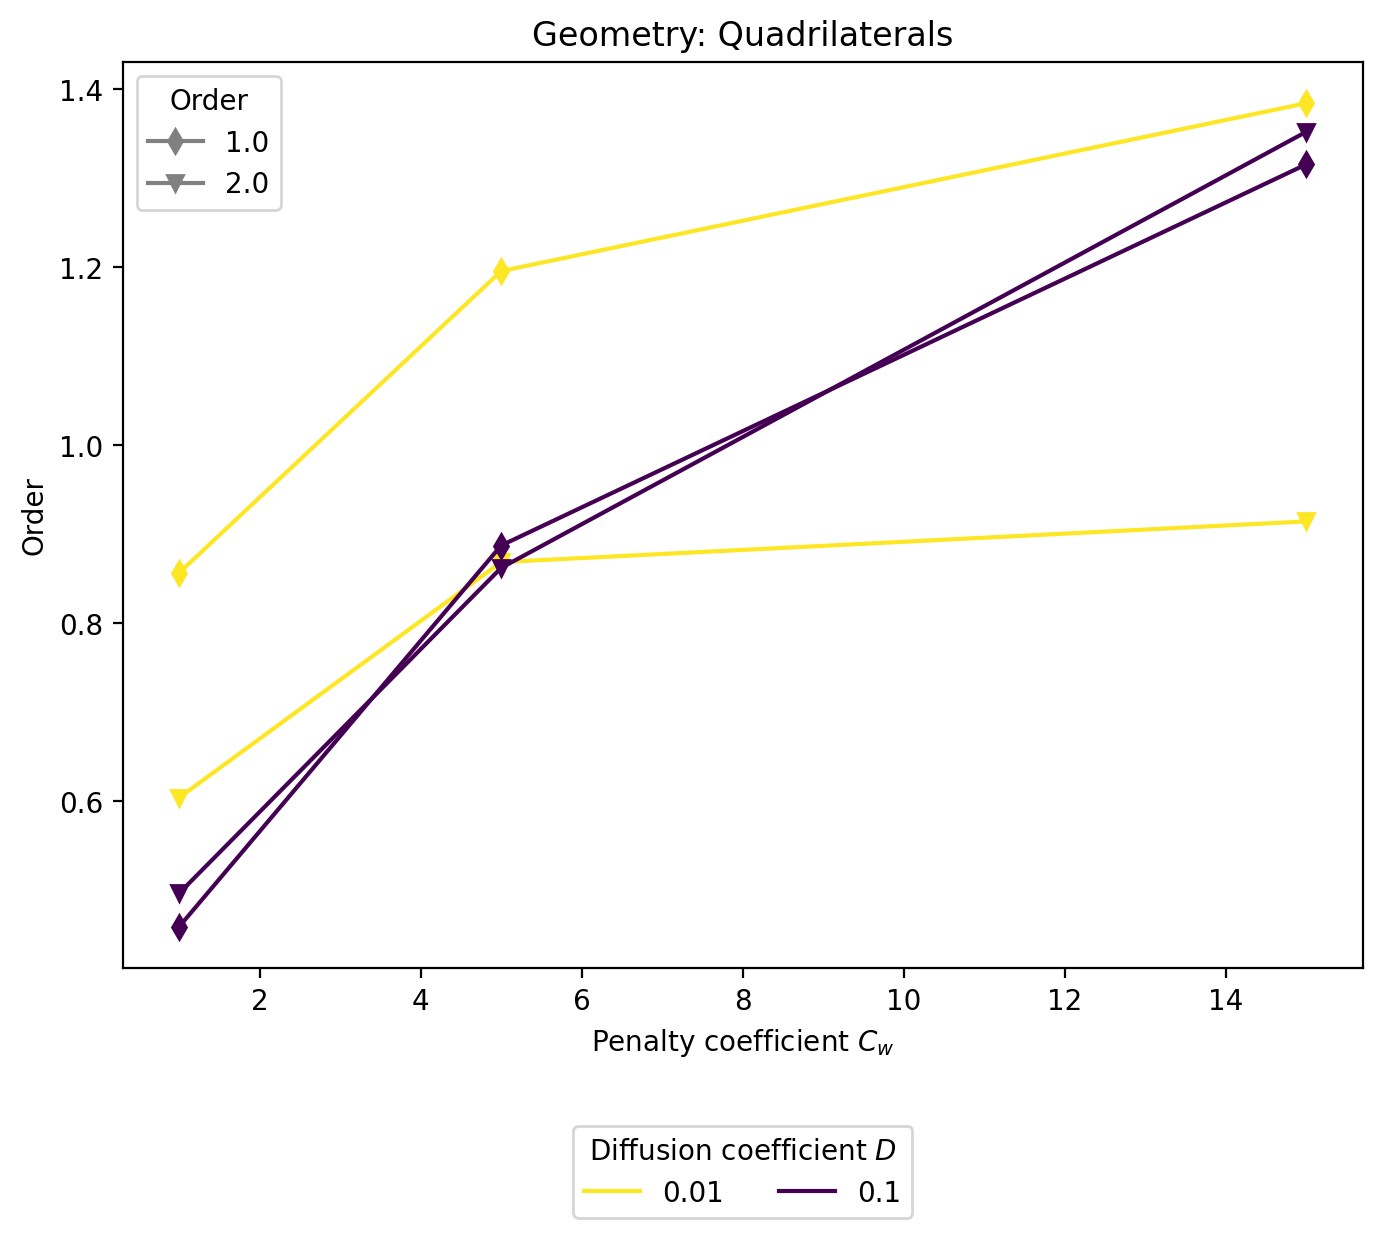

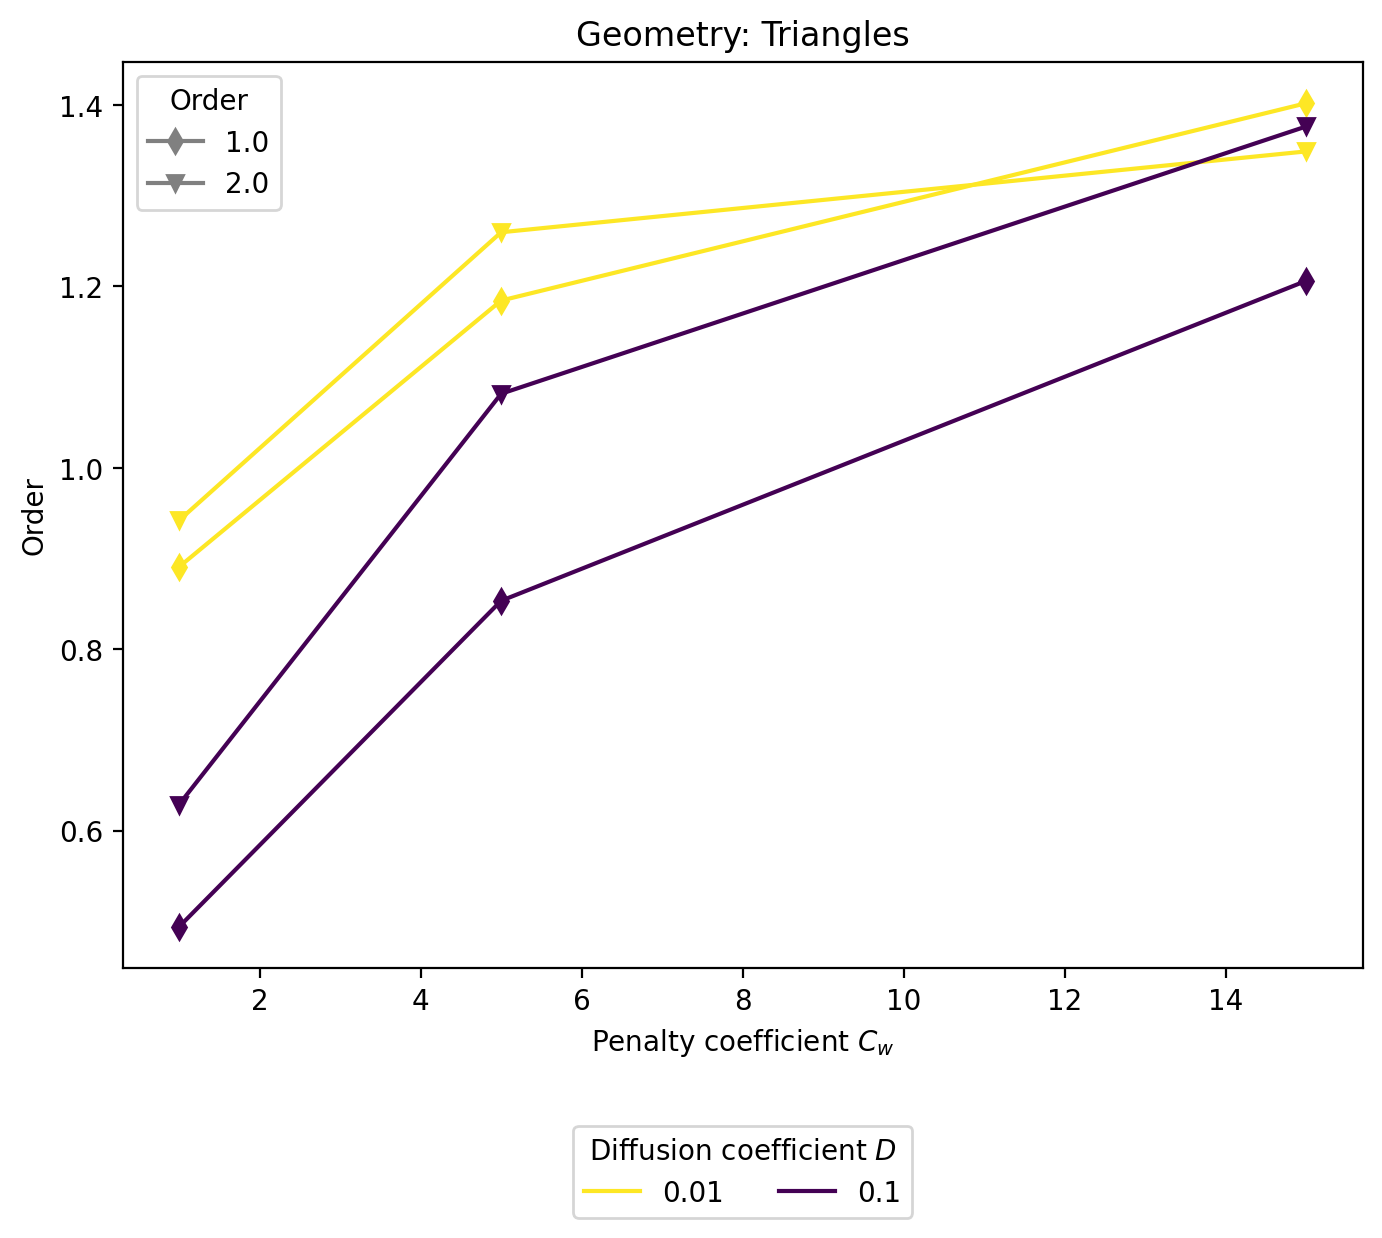

In [86]:
for gel in df["gel"].unique():
    fe = cp.plot_agregated_var(df[(df["gel"] == gel)],
                            y_var="num_order", y_lab="Order", ylogscale=False,
                            color_var="diffcoef", color_lab="Diffusion coefficient $D$",
                            x_var="cw",
                            x_lab="Penalty coefficient $C_w$",
                            xlogscale=False,
                            ax_title = f"Geometry: {gel}")

## Advection and

UnboundLocalError: local variable 'omarks' referenced before assignment

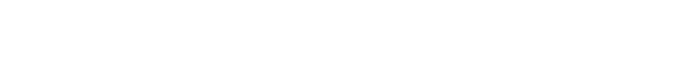

In [88]:
f = cp.plot_parametrized_var(df[(df["cfl"] == .1) & (df["adflux"] < 1)],
                   y_var="diff_l2", y_lab="$L^2$ relative error",
                   x_var="n_cells", x_lab="$1/h$",
                   row_var="limit", row_lab="Limiting",
                   column_var="cfl", column_lab="CFL",
                   color_var="adflux", color_lab="Flux $\\alpha$",
                   alpha=.5,
                   figsize=(9, 13),
                   lines_leg_rect=[0.2, 0.07, 0.01, 0.01],
                   marks_leg_rect=[0.55, .07, 0.01, 0.01]
                   )

In [114]:
reload(cp)

<module 'convergence_plots' from 'C:\\Users\\tomas\\PycharmProjects\\Numerics\\dg_examples\\convergence_plots.py'>

## Burgers 1D

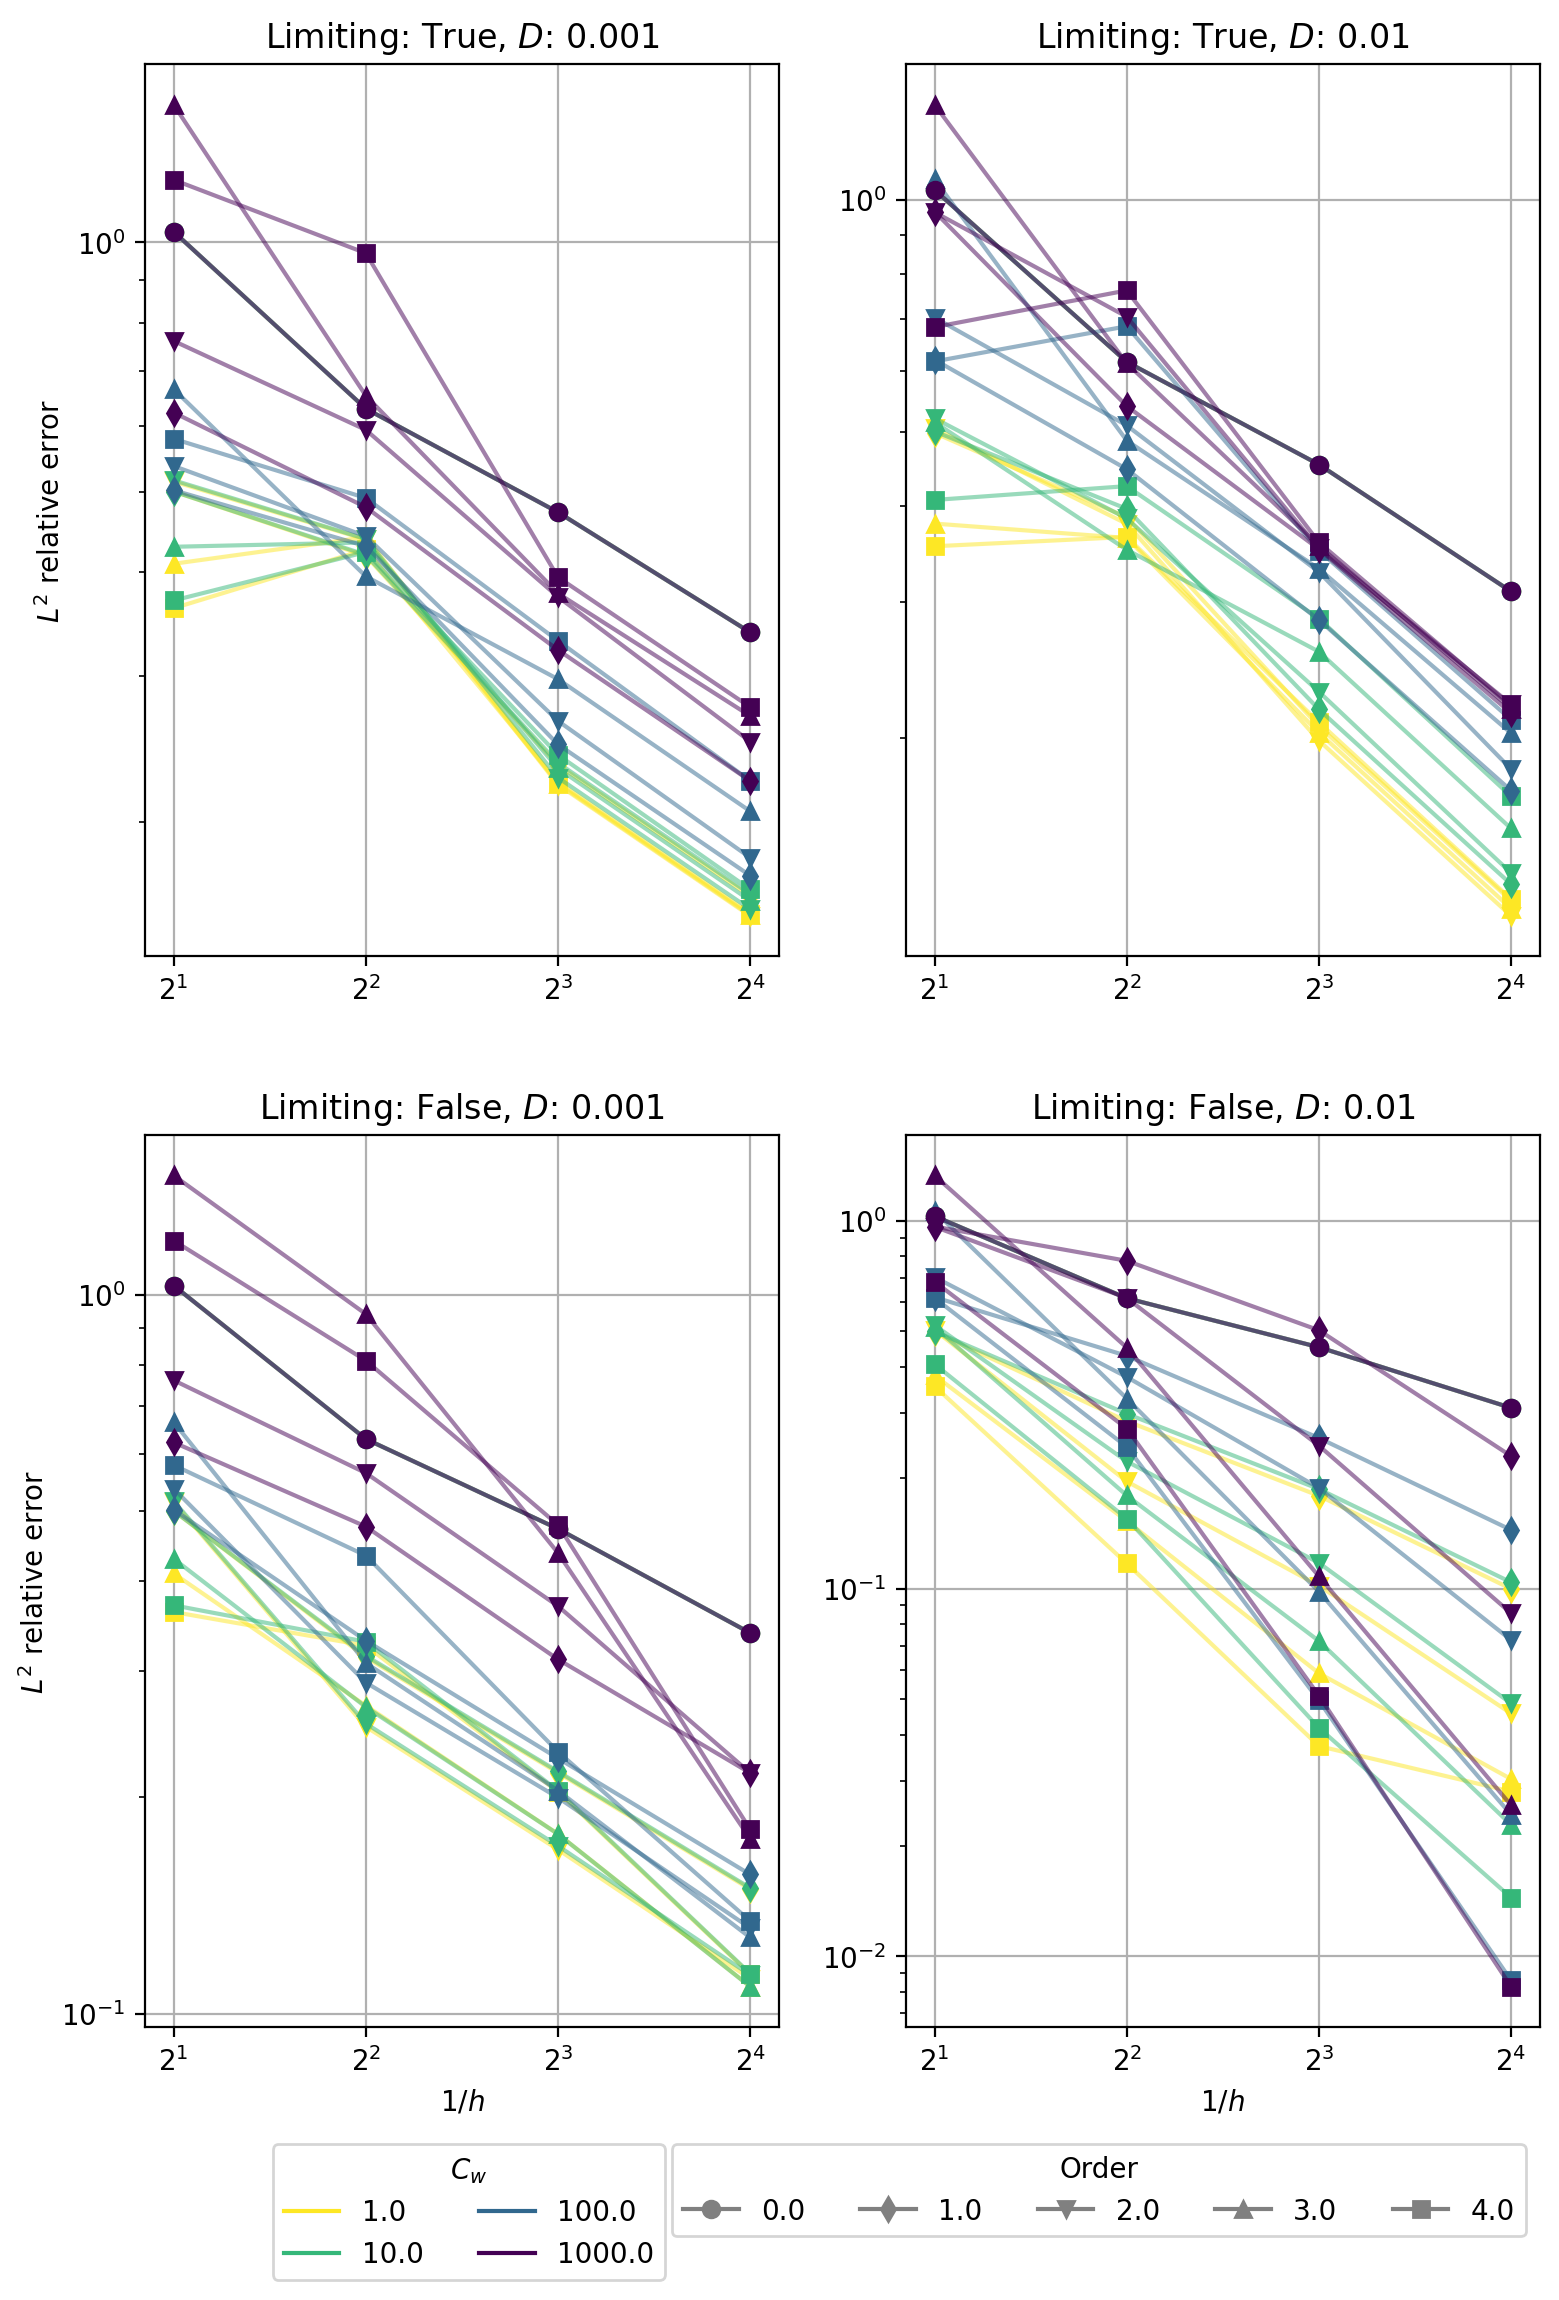

In [118]:
f = cp.plot_parametrized_var(
                   df[(df["cfl"] == 0.001) & (df["cw"] < 10e3)],
                   y_var="diff_l2", y_lab="$L^2$ relative error",
                   x_var="n_cells", x_lab="$1/h$",
                   row_var="limit", row_lab="Limiting",
                   column_var="diffcoef", column_lab="$D$",
                   color_var="cw", color_lab="$C_w$",
                   mark_lab="Order",
                   alpha=.5,
                   figsize=(9, 13),
                   lines_leg_rect=[0.3, 0.07, 0.01, 0.01],
                   marks_leg_rect=[0.65, .07, 0.01, 0.01],
                   lines_ncol=2
                   )

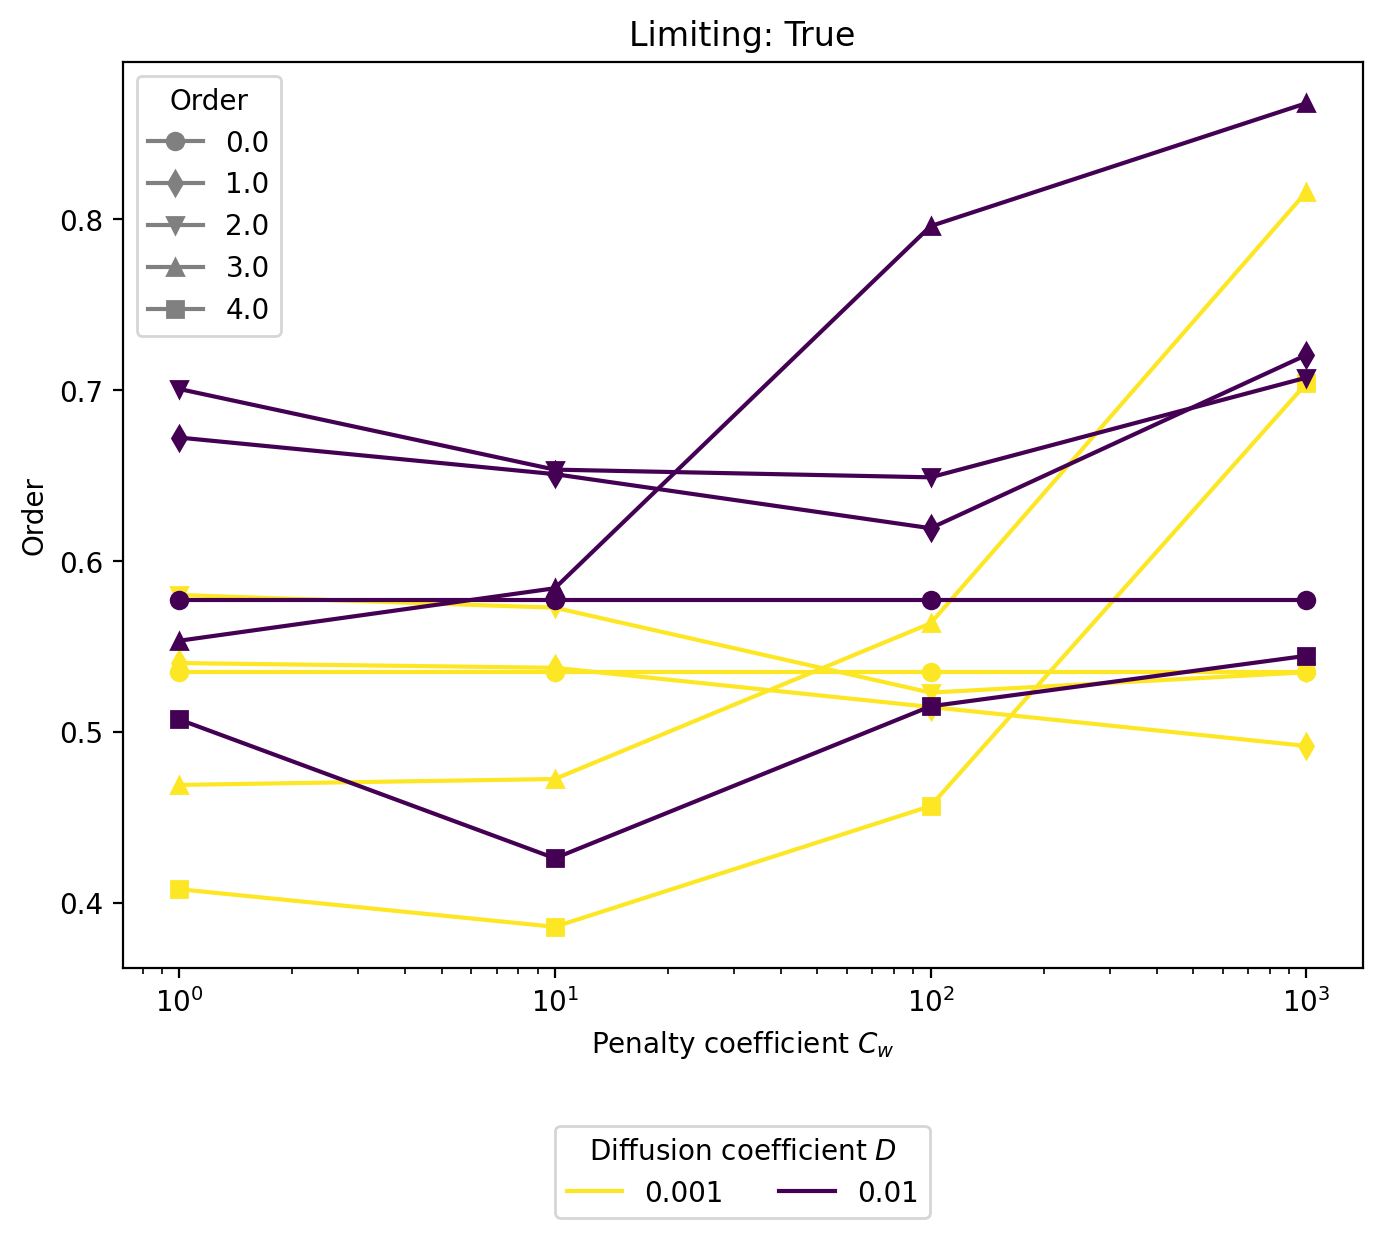

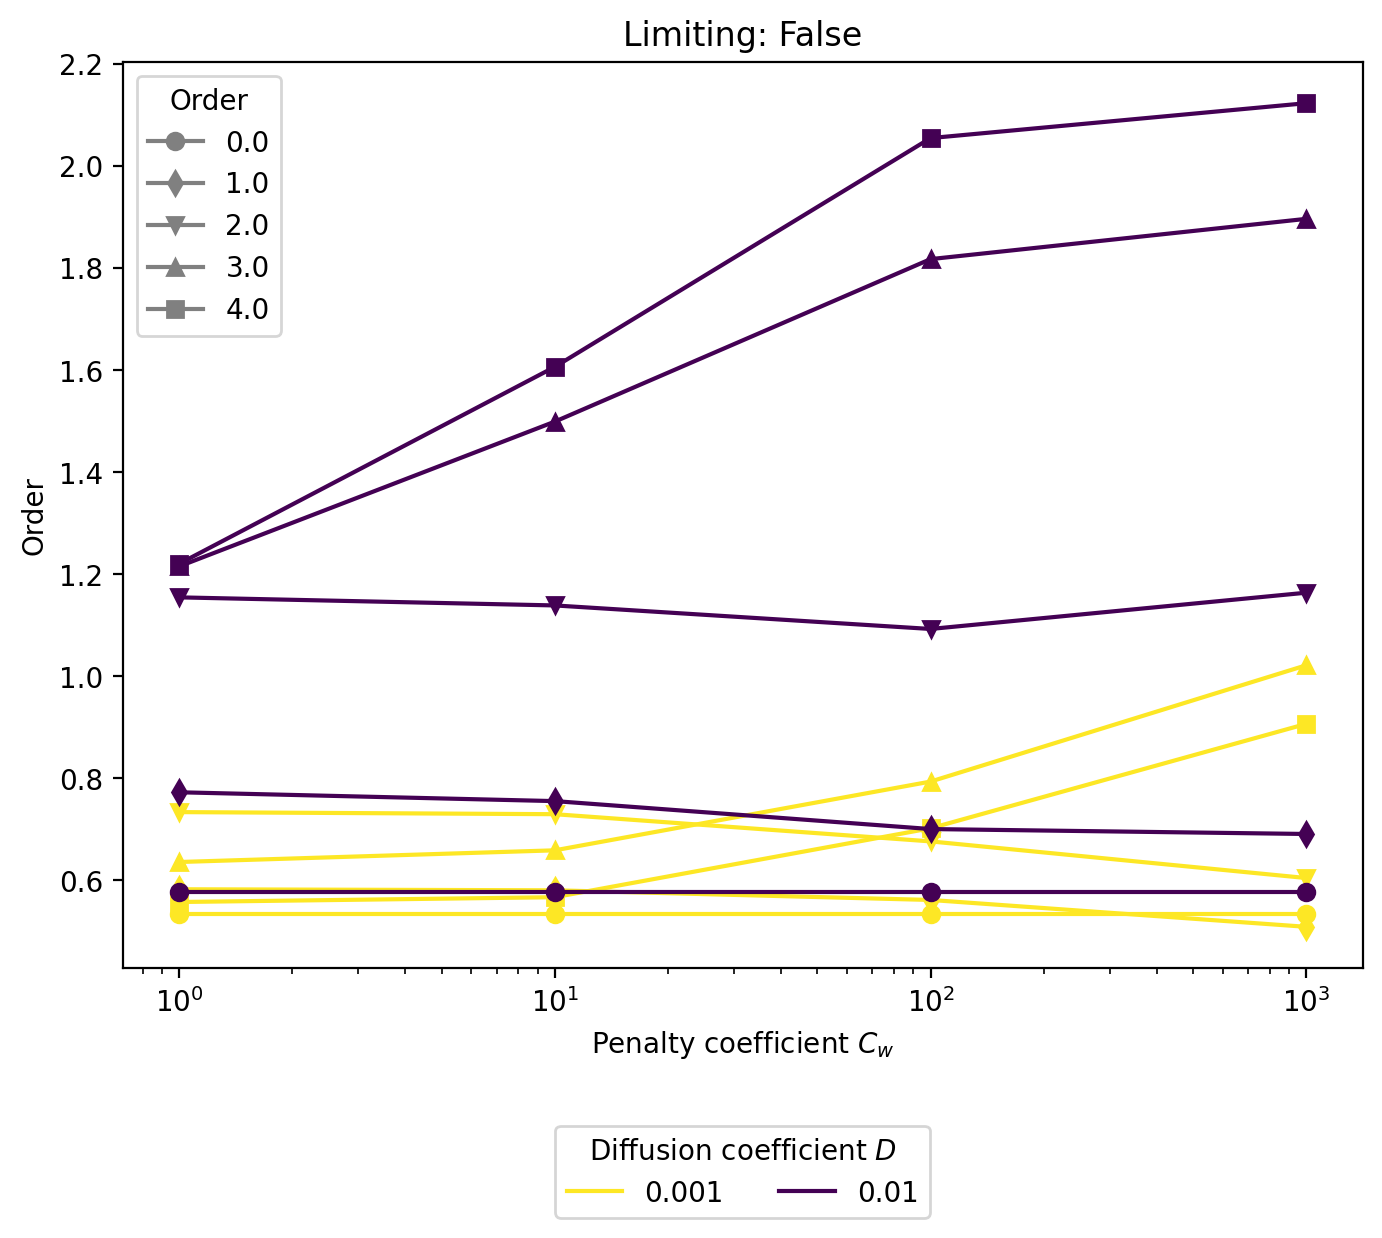

In [119]:
for lim in df["limit"].unique():
    fe = cp.plot_agregated_var(df[(df["cfl"] == 0.001) & (df["cw"] < 10e3) & (df["limit"] == lim)],
                                y_var="num_order", y_lab="Order", ylogscale=False,
                                color_var="diffcoef", color_lab="Diffusion coefficient $D$",
                                x_var="cw",
                                x_lab="Penalty coefficient $C_w$",
                                ax_title = f"Limiting: {lim}")